<a href="https://colab.research.google.com/github/S-Ngigi/ML/blob/master/Multivariate_Analysis_I_(Exploratory_Data_Analysis)_Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate Analysis (Exploratory Data Analysis) - Exercise 2

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> A car sales person would like to know whether a certain dealer is offering fair value of his trade-ins. To help this car dealer, create a model to predict the price of a car using the variables in the given dataset. The outcome would give an objective idea of how much the car should cost. Apply facotr analysis while developing your model.

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [101]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Loading the Data from the source i.e. csv
# ---
url = "http://bit.ly/AutoDataset"
car_data = pd.read_csv(url)
car_data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## 3. Checking the Data

In [14]:
# Determining the no. of records in our dataset
car_data.shape

(201, 29)

In [15]:
# Previewing the top of our dataset
car_data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [16]:
# Previewing the bottom of our dataset
car_data.tail()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0
200,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0,12.368421,Medium,0,1


In [17]:
# Checking whether each column has an appropriate datatype
car_data.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

# Exploratory Analysis

## 5. Tidying the Dataset

We'll divide the data into categorical variables and numerical variables.

We will then visualize their distributions to identify outliers and/or anomalies. 

In [18]:
car_data.isna().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [0]:
car_data.dropna(inplace=True)

In [0]:
def unique_n(df):
  print("# of unique values")
  for i in df.columns.values.tolist():
    if df[i].nunique() <= 6:
      print("*" * 100)
      print(i, ": ", df[i].nunique())
      print(i, "Value counts")
      print( df[i].value_counts())
      print("*" * 100)
    else:
      print(i, ": ", df[i].nunique())

In [103]:
# Extracting numerical features
num_cols = car_data.select_dtypes(exclude='object')
num_cols.dtypes

symboling              int64
normalized-losses      int64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-size            int64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
diesel                 int64
gas                    int64
dtype: object

In [0]:
# num_cols[num_cols['stroke'].isnull()]

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
52,3,150,95.3,0.81211,0.9125,49.6,2380,70,3.329751,NaN,9.4,101.0,6000.0,17,23,10945.0,13.823529,0,1
53,3,150,95.3,0.81211,0.9125,49.6,2380,70,3.329751,NaN,9.4,101.0,6000.0,17,23,11845.0,13.823529,0,1
54,3,150,95.3,0.81211,0.9125,49.6,2385,70,3.329751,NaN,9.4,101.0,6000.0,17,23,13645.0,13.823529,0,1
55,3,150,95.3,0.81211,0.9125,49.6,2500,80,3.329751,NaN,9.4,135.0,6000.0,16,23,15645.0,14.687500,0,1


In [0]:
# MCTs of numerical columns
num_desc = num_cols.describe().round(1)
print(num_desc.shape)
num_desc

(8, 19)


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,197.0,197.0,197.0,197.0,197.0,197.0,197.0,197.0,197.0,197.0,197.0,197.0,197.0,197.0,197.0,197.0,197.0,197.0,197.0
mean,0.8,121.4,98.9,0.8,0.9,53.9,2558.6,128.0,3.3,3.3,10.2,103.3,5099.7,25.4,30.8,13210.9,9.9,0.1,0.9
std,1.2,32.1,6.1,0.1,0.0,2.4,522.1,41.2,0.3,0.3,4.0,37.7,465.9,6.4,6.8,8023.6,2.5,0.3,0.3
min,-2.0,65.0,86.6,0.7,0.8,47.8,1488.0,61.0,2.5,2.1,7.0,48.0,4150.0,13.0,16.0,5118.0,4.8,0.0,0.0
25%,0.0,98.0,94.5,0.8,0.9,52.0,2145.0,98.0,3.2,3.1,8.5,70.0,4800.0,20.0,25.0,7775.0,7.8,0.0,1.0
50%,1.0,122.0,97.0,0.8,0.9,54.1,2420.0,120.0,3.3,3.3,9.0,95.0,5100.0,25.0,30.0,10198.0,9.4,0.0,1.0
75%,2.0,134.0,102.4,0.9,0.9,55.6,2935.0,145.0,3.6,3.4,9.4,116.0,5500.0,30.0,34.0,16503.0,11.8,0.0,1.0
max,3.0,256.0,120.9,1.0,1.0,59.8,4066.0,326.0,3.9,4.2,23.0,262.0,6600.0,49.0,54.0,45400.0,18.1,1.0,1.0


In [0]:
print("# of unique values")
for i in num_cols.columns.values.tolist():
  if num_cols[i].nunique() <= 6:
    print("*" * 100)
    print(i, ": ", num_cols[i].nunique())
    print(i, "Value counts")
    print( num_cols[i].value_counts())
    print("*" * 100)
  else:
    print(i, ": ", num_cols[i].nunique())

# of unique values
****************************************************************************************************
symboling :  6
symboling Value counts
 0    65
 1    52
 2    32
 3    23
-1    22
-2     3
Name: symboling, dtype: int64
****************************************************************************************************
normalized-losses :  51
wheel-base :  51
length :  72
width :  42
height :  48
curb-weight :  167
engine-size :  41
bore :  38
stroke :  36
compression-ratio :  32
horsepower :  58
peak-rpm :  23
city-mpg :  29
highway-mpg :  30
price :  182
city-L/100km :  29
****************************************************************************************************
diesel :  2
diesel Value counts
0    177
1     20
Name: diesel, dtype: int64
****************************************************************************************************
****************************************************************************************************
gas :  2
gas Val

In [0]:
# Identifying the Missing Data
num_cols.isnull().sum()

symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
diesel               0
gas                  0
dtype: int64

Plotting Distributions of all our numerical data

In [0]:
num_cols['stroke'].shape

(201,)

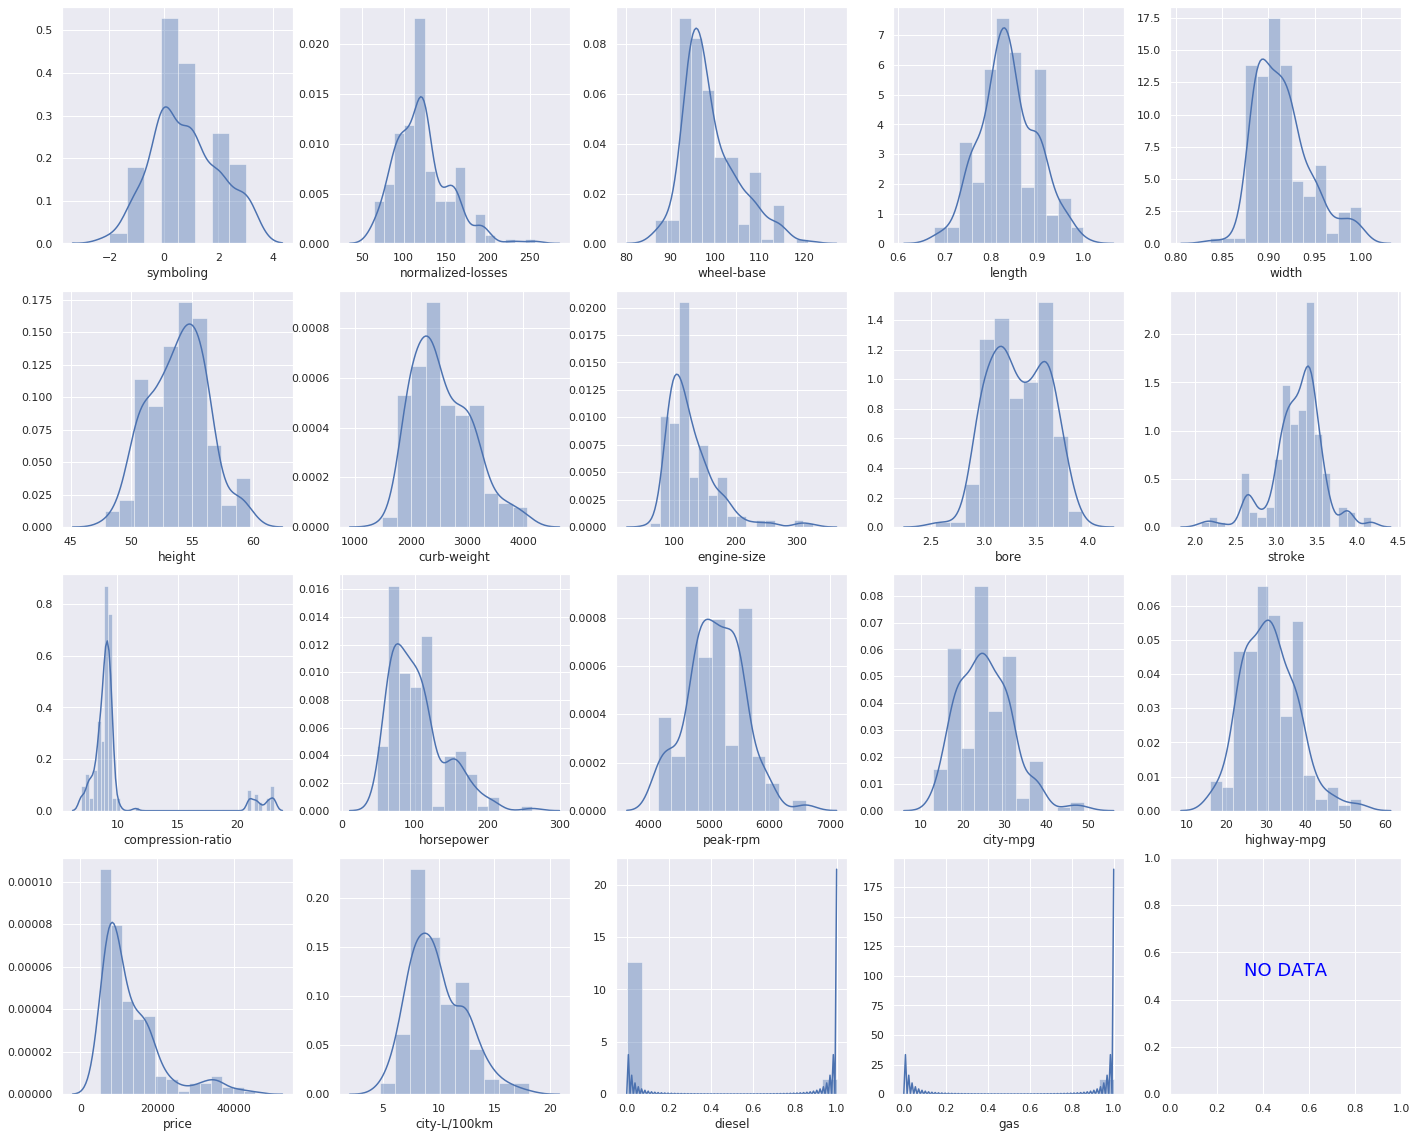

In [0]:
# Defining the figure size and number of plots we want
fig, axs = plt.subplots(4, 5, figsize=(24, 20))
# Unraveling the 4 by 5 axis matrix into a 1D arrary to get total # of plots
axs = axs.ravel()
# Extracting column names
col_names = num_cols.columns.values.tolist()

# Iterating through the axis
for i in range(len(axs)):
  # Extracting the col_name/feature at an iteration
  if len(col_names) > i:
    # Plotting the distriburion
    sns.distplot(num_cols[col_names[i]], ax=axs[i])
  else:
    # Plotting no Data
    axs[i].text(0.5, 0.5, "NO DATA", color='blue', fontsize=18, ha='center')

# Showing plot
plt.show()


Here we note that most of the data is kinda normaly distributed, with the exception of 

1. Engine size
2. Compression ratio
3. Price
4. Diesel
5. Gas

Lets plot box plot visualize anomalies and outliers from another percpective.

For our general box plots we will remove Diesel and Gas because they are categorical in nature

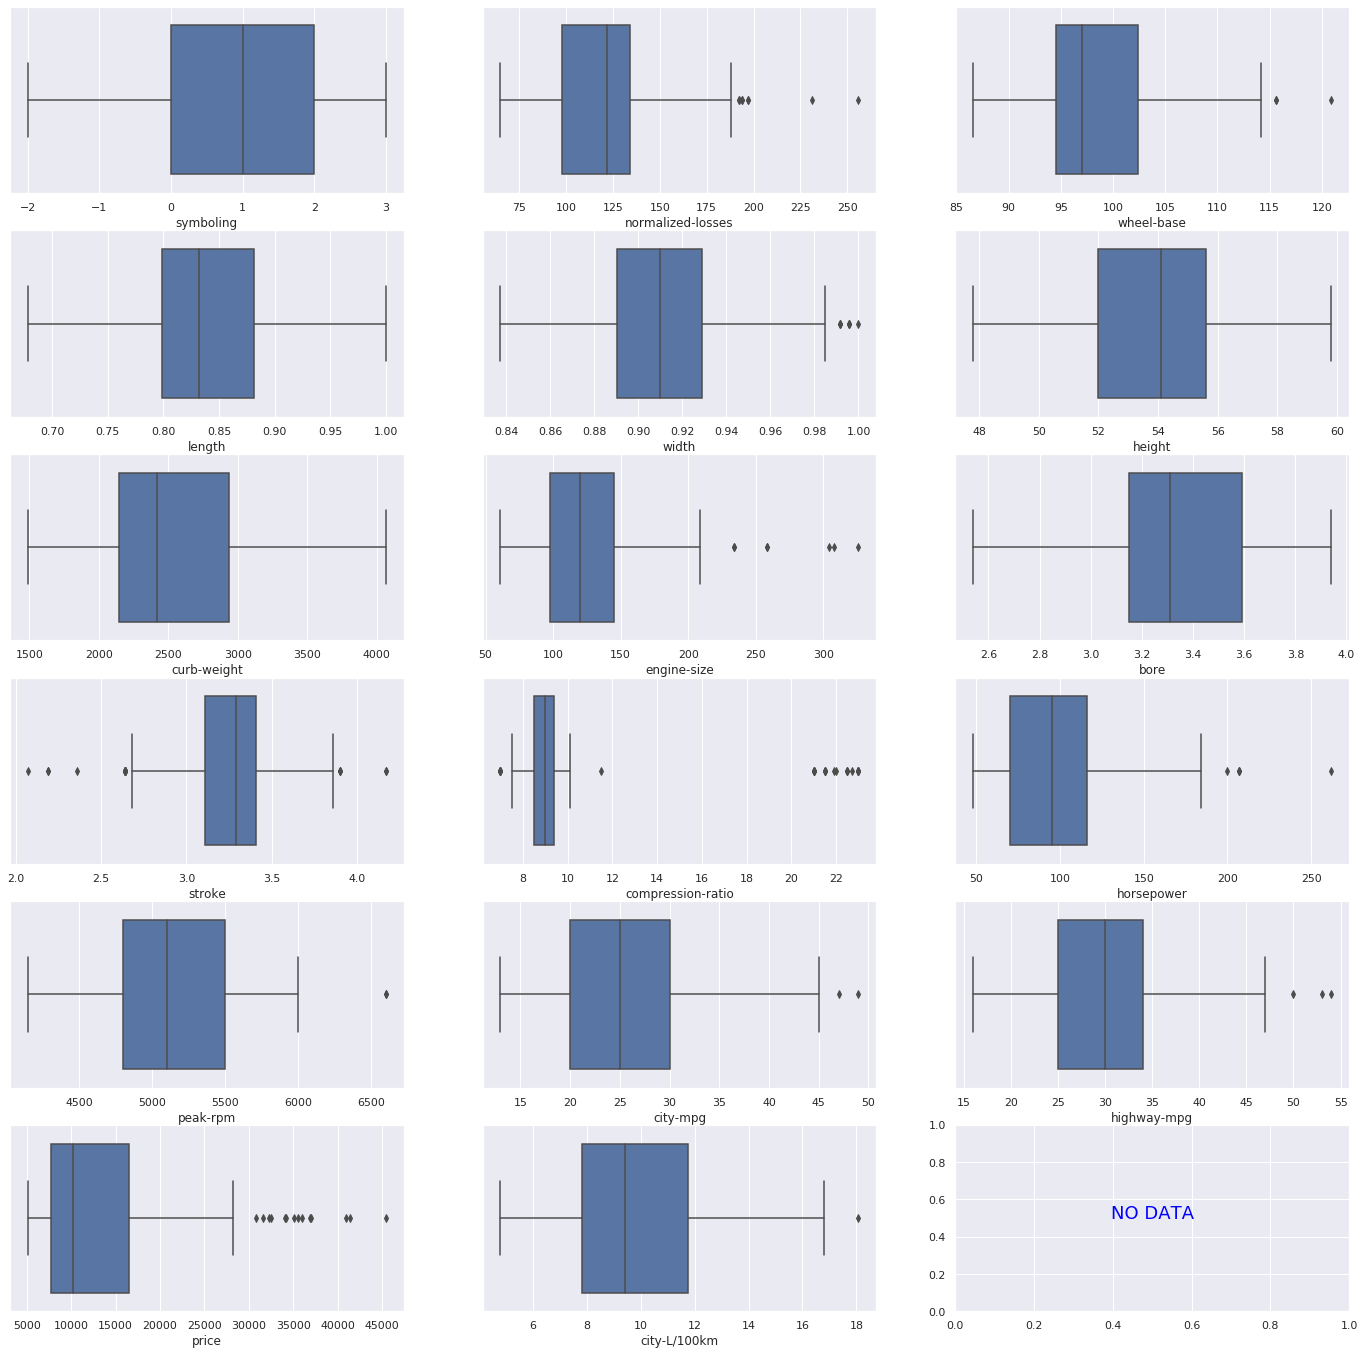

In [0]:
# Checking for Anomalies
# Defining the figure size and number of plots we want
fig, axs = plt.subplots(6, 3, figsize=(24, 24))
# Unraveling the 4 by 5 axis matrix into a 1D arrary to get total # of plots
axs = axs.ravel()
# Extracting column names
col_names = num_cols[num_cols.columns[~num_cols.columns.isin(['gas', 'diesel'])]].columns.values.tolist() 

# Iterating through the axis
for i in range(len(axs)):
  # Extracting the col_name/feature at an iteration
  if len(col_names) > i:
    # Plotting the distriburion
    sns.boxplot(num_cols[col_names[i]], ax=axs[i])
  else:
    # Plotting no Data
    axs[i].text(0.5, 0.5, "NO DATA", color='blue', fontsize=18, ha='center')

# Showing plot
plt.show()

Lets visualize a this using a violin to view the distribution summaries from another angle

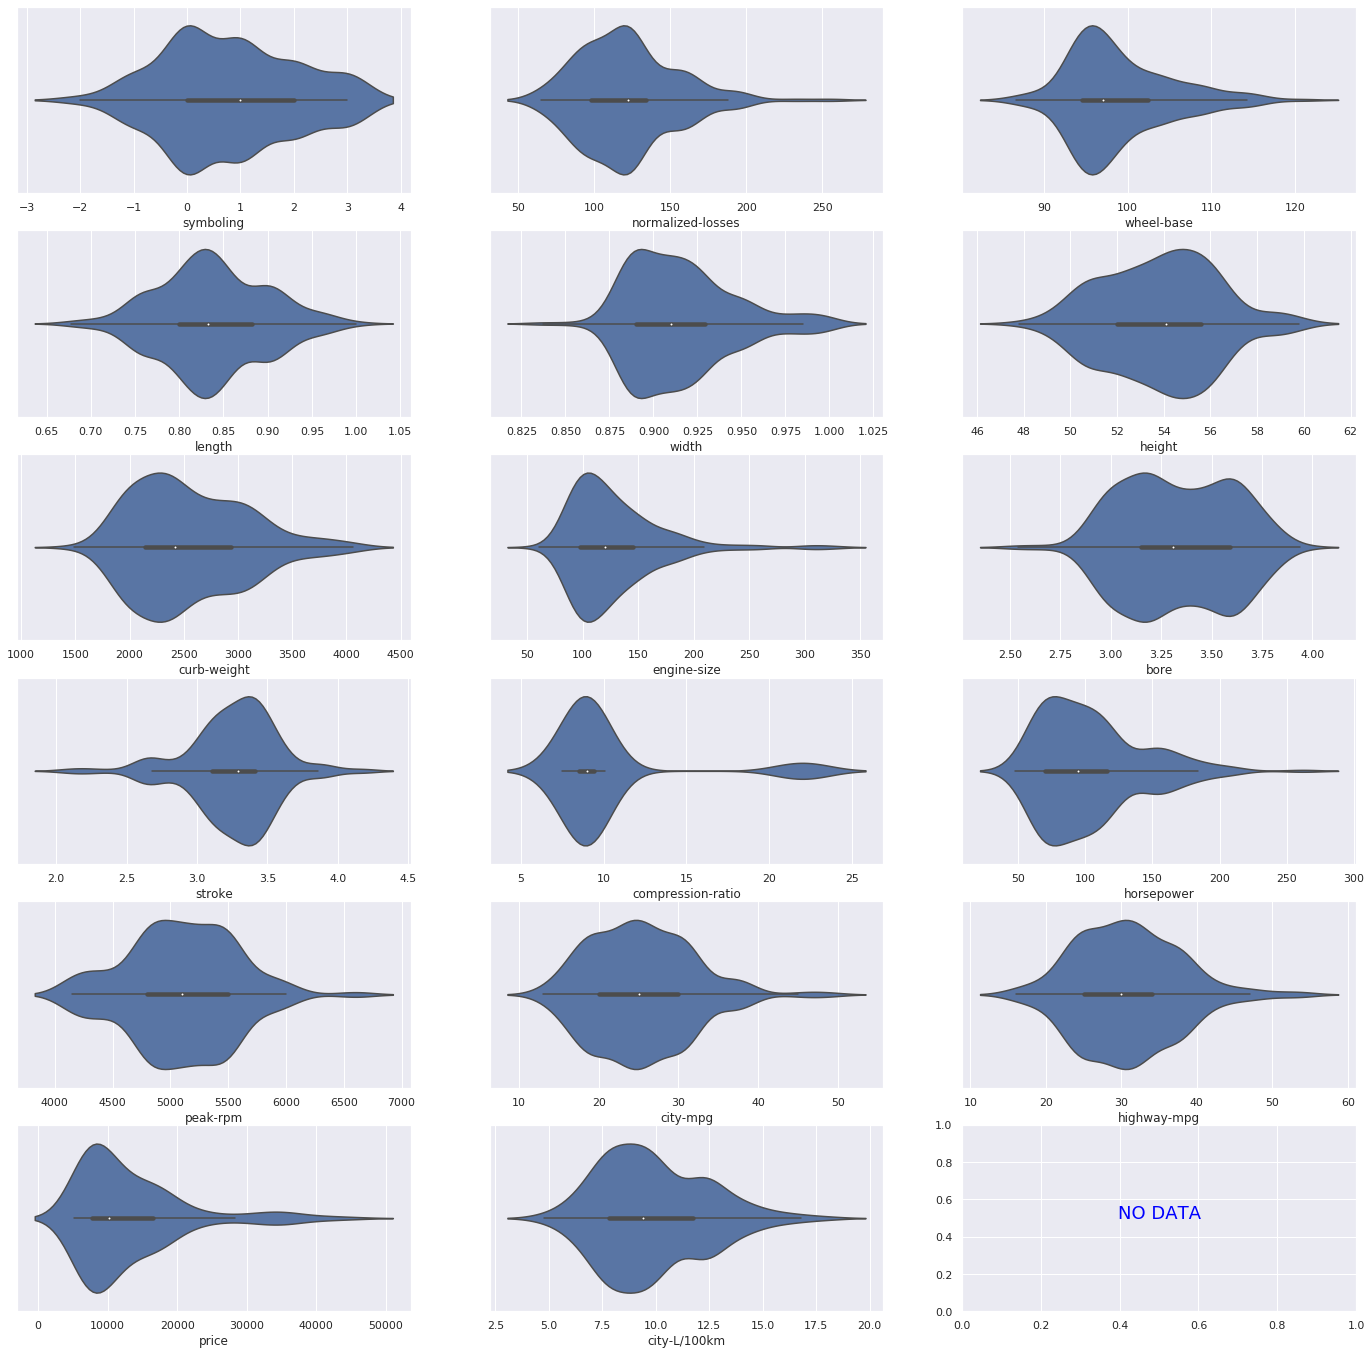

In [0]:
# Checking for Anomalies
# Defining the figure size and number of plots we want
fig, axs = plt.subplots(6, 3, figsize=(24, 24))
# Unraveling the 4 by 5 axis matrix into a 1D arrary to get total # of plots
axs = axs.ravel()
# Extracting column names
col_names = num_cols[num_cols.columns[~num_cols.columns.isin(['gas', 'diesel'])]].columns.values.tolist() 

# Iterating through the axis
for i in range(len(axs)):
  # Extracting the col_name/feature at an iteration
  if len(col_names) > i:
    # Plotting the distriburion
    sns.violinplot(num_cols[col_names[i]], ax=axs[i])
  else:
    # Plotting no Data
    axs[i].text(0.5, 0.5, "NO DATA", color='blue', fontsize=18, ha='center')

# Showing plot
plt.show()

We note that the following columns seem to have outliers/anomalies
1. normalized loses
2. wheel base
3. width
4. engine size
5. stroke
6. compression-ration
7. horsepower
8. peak-rpm
9. city-mpg
9. highway mpg
10 price

Before remove any outliers we shall try to first create a simple, baseline model

We will proceed to analyse our categorrical data using barplots and pie charts

In [91]:
cat_cols = car_data.select_dtypes(include='object')
print(cat_cols.shape)
cat_cols.dtypes

(196, 10)


make                 object
aspiration           object
num-of-doors         object
body-style           object
drive-wheels         object
engine-location      object
engine-type          object
num-of-cylinders     object
fuel-system          object
horsepower-binned    object
dtype: object

In [0]:
cat_cols[['gas', 'diesel', 'symboling']] = num_cols[['gas', 'diesel', 'symboling']].copy()

In [93]:
cat_cols.isnull().sum()

make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
engine-type          0
num-of-cylinders     0
fuel-system          0
horsepower-binned    0
gas                  0
diesel               0
symboling            0
dtype: int64

In [0]:
unique_n(cat_cols)

# of unique values
make :  22
****************************************************************************************************
aspiration :  2
aspiration Value counts
std      160
turbo     36
Name: aspiration, dtype: int64
****************************************************************************************************
****************************************************************************************************
num-of-doors :  2
num-of-doors Value counts
four    115
two      81
Name: num-of-doors, dtype: int64
****************************************************************************************************
****************************************************************************************************
body-style :  5
body-style Value counts
sedan          93
hatchback      64
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64
****************************************************************************************************
*****

In [0]:
def barit_lst(data_cols, cat=None):
    # ,ex_cols=None, inc_cols=None, cat=None
    # if ex_cols:
    #     data_cols = data[data.columns[~data.columns.isin(ex_cols)]]
    # else:
    #     data_cols = data[data.columns[data.columns.isin(inc_cols)]]

    cat_name = data_cols.columns.values.tolist()

    # Defining the figure size and number of plots we want
    fig, axs = plt.subplots(7, 2, figsize=(28, 70))
    # Unraveling the 4 by 5 axis matrix into a 1D arrary to get total # of plots
    axs = axs.ravel()

    for i in range(len(cat_name)):
      counts = data_cols[cat_name[i]].value_counts()
      labels = data_cols[cat_name[i]].value_counts().index
      sns.countplot(x=cat_name[i], data=data_cols, hue=cat, order=labels, ax=axs[i])
      axs[i].set_title('Number of customers by ' + cat_name[i])
      axs[i].set_xlabel(cat_name[i])
      axs[i].set_ylabel("Count")
      plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=30)
      # plt.xticks(rotation=90)
      plt.tick_params(labelsize=6)
        
      total = data_cols.shape[0]
      
      for p in axs[i].patches:
          axs[i].text(p.get_x() + p.get_width()/2., p.get_height() + 1, '{0:.0%}'.format((p.get_height()/total), ha='center'))
            
    plt.show()

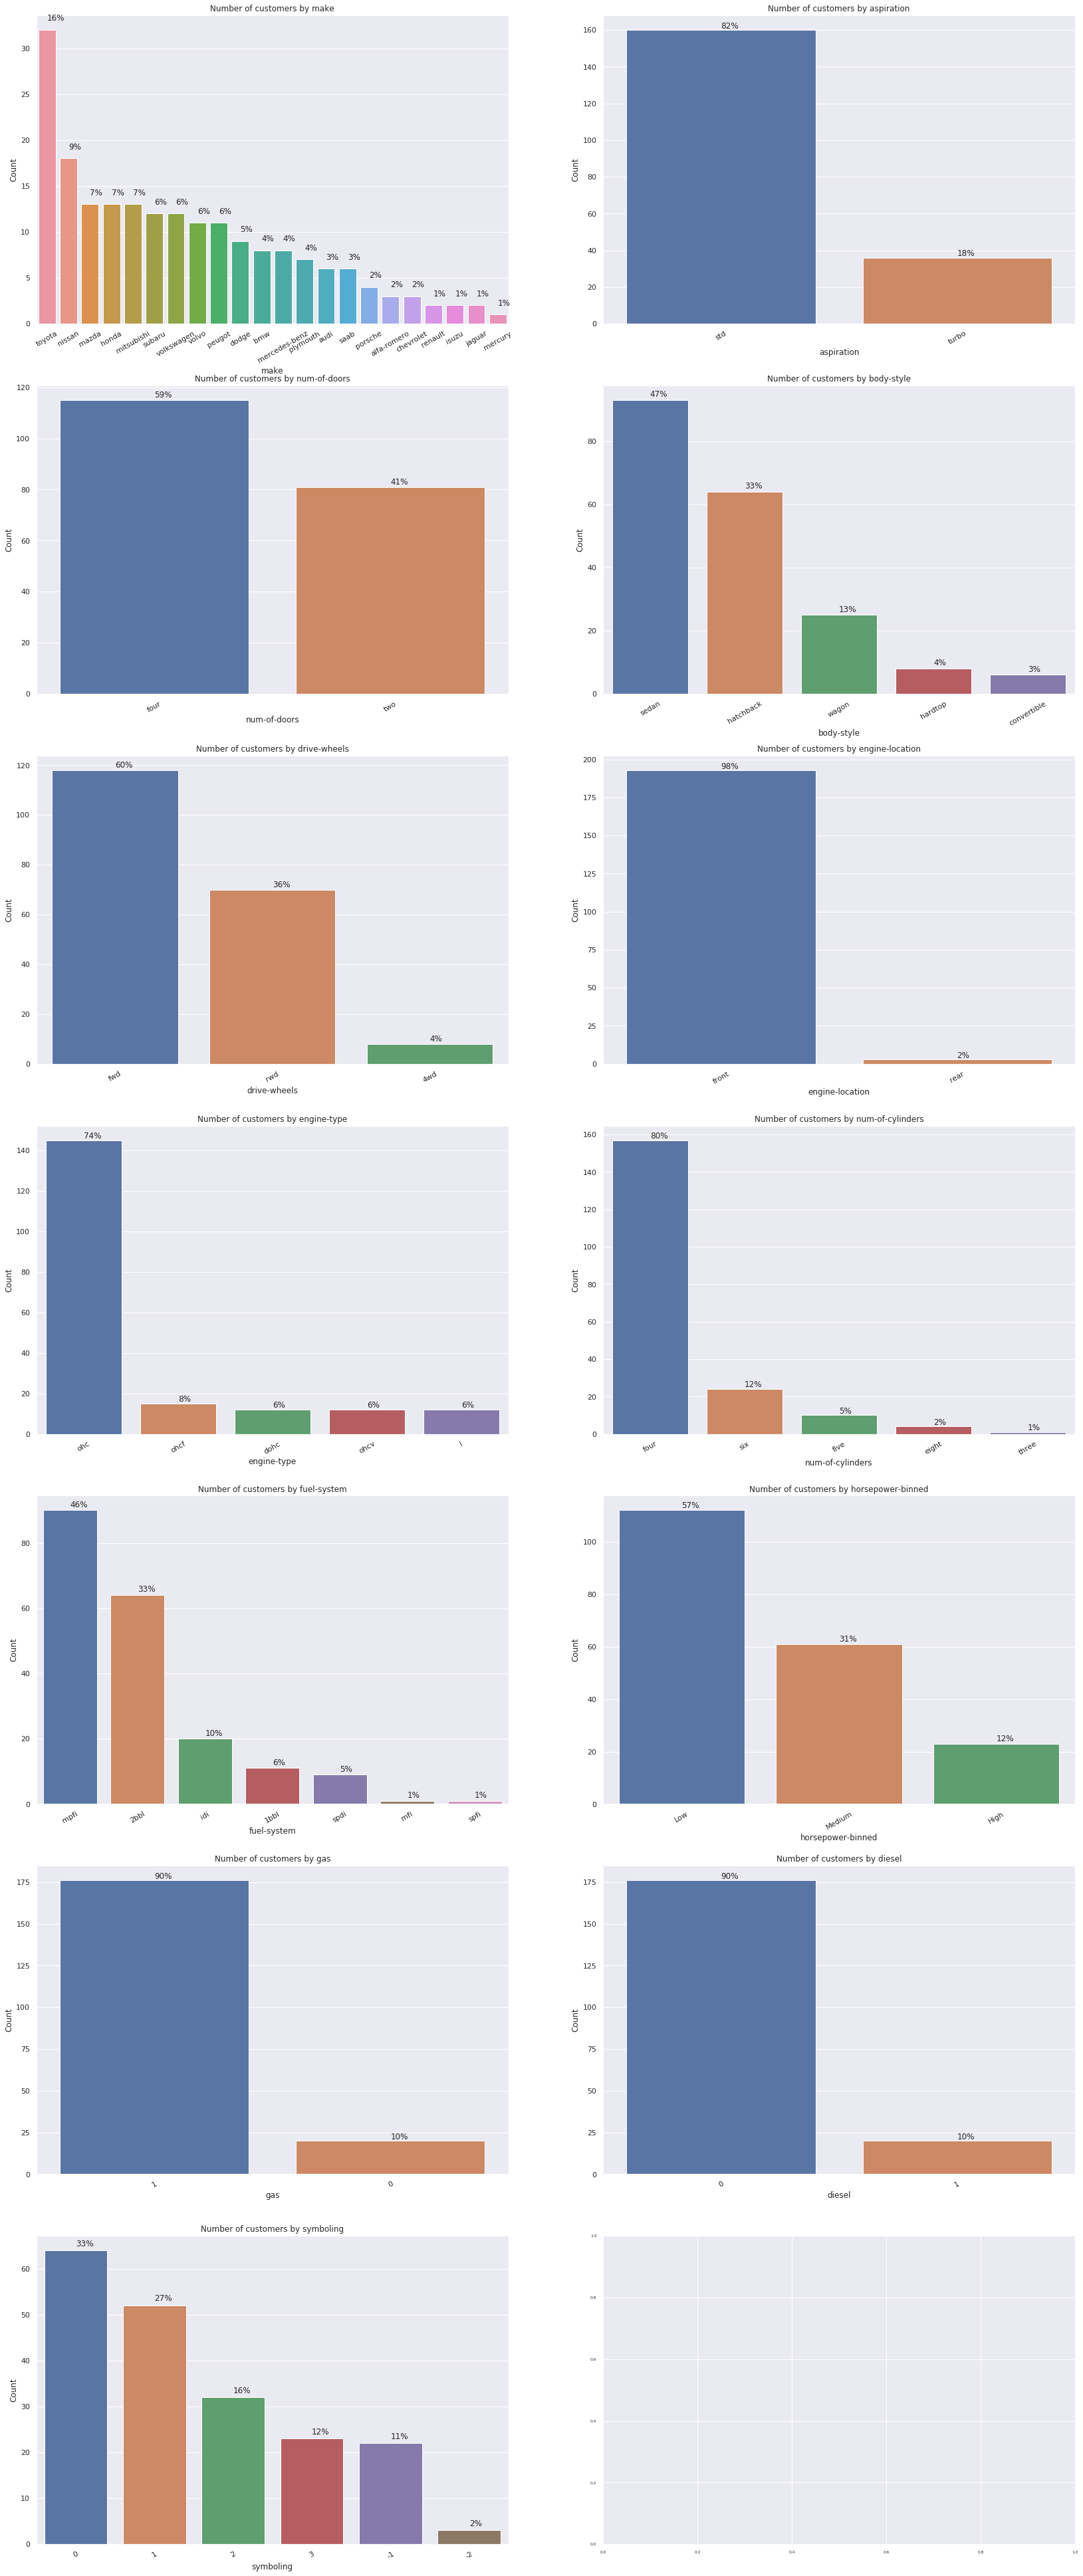

In [99]:
barit_lst(cat_cols)

Gas and Diesel seem to be representing the same information. Therefore we will drop the Diesel column

In [0]:
cat_cols.drop('diesel', axis=1, inplace=True)

In [0]:
# Ploting the bivariate summaries and recording our observations
def plt_scatter(df, cols=[], col_y='price', hue=None):
  fig, axs = plt.subplots(5, 3, figsize=(28, 35))
  axs = axs.ravel()
  x = df.drop(col_y, axis=1)
  df_cols = x[x.columns[~x.columns.isin(cols)]].columns.values.tolist()
  for i in range(len(df_cols)):
    sns.scatterplot(x = df_cols[i], y=col_y, data=df, hue=hue, hue_order=[1, 0], ax=axs[i])
    axs[i].set_title(df_cols[i] + " vs " + col_y)
  plt.show()

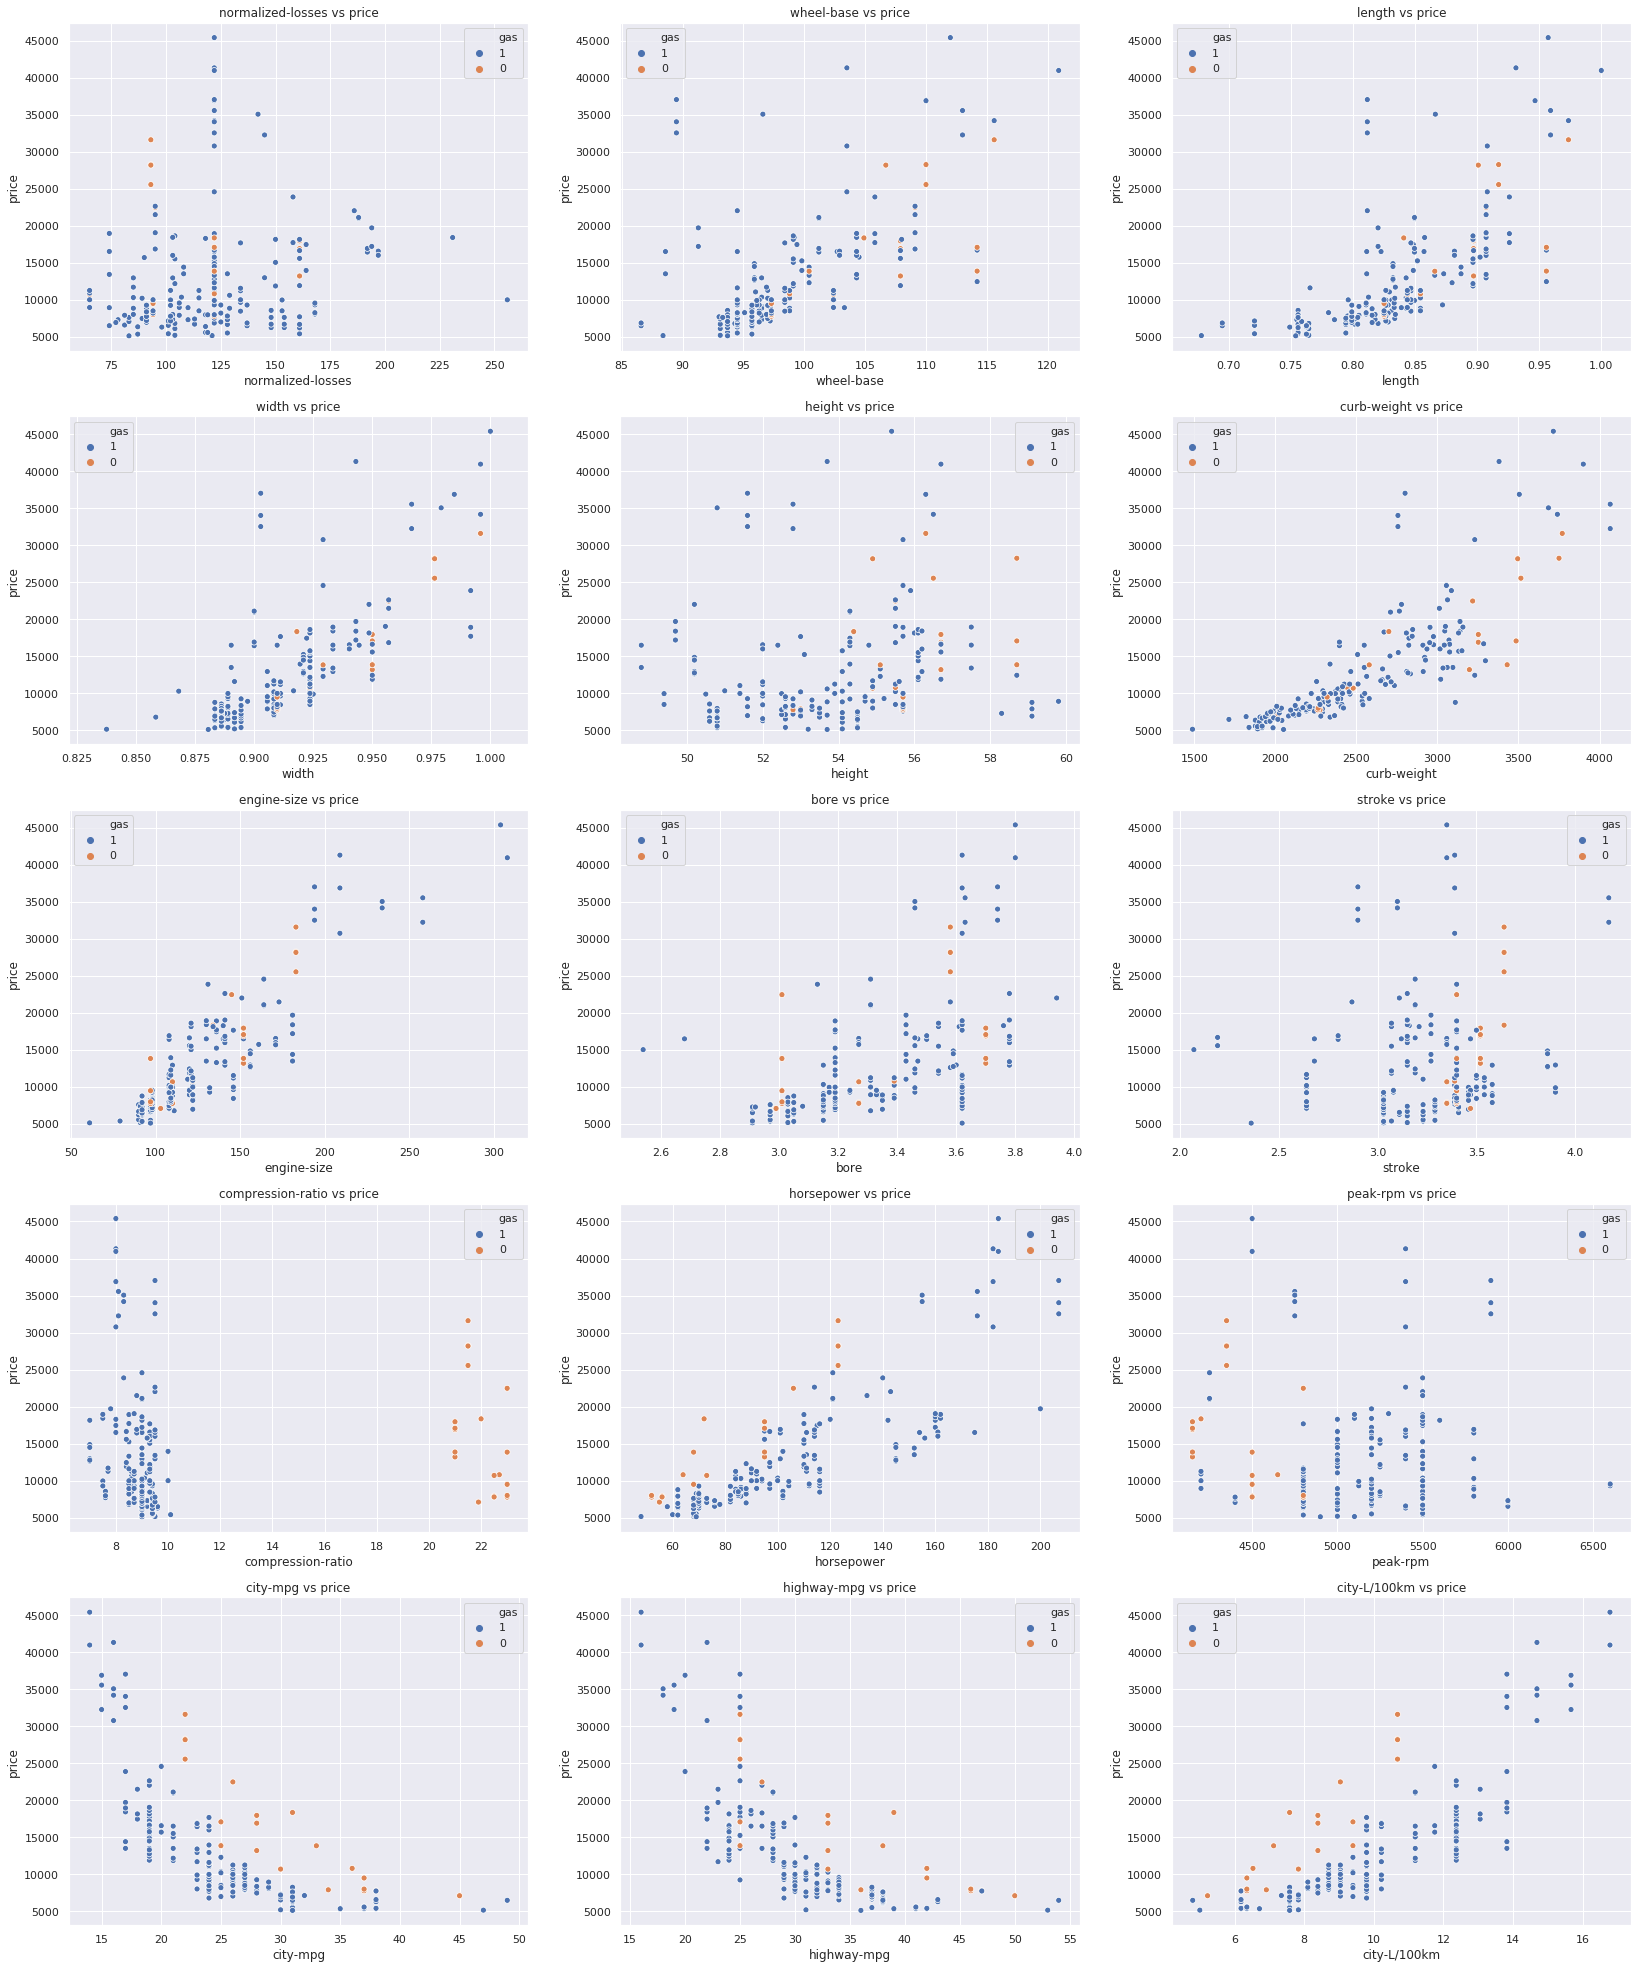

In [112]:
plt_scatter(num_cols, ['gas', 'diesel', 'symboling'], hue='gas')

## 7. Implementing the Solution

In [0]:
# Implementing the Solution
# 

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [0]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?